In [157]:
import matplotlib.gridspec as gridspec
#Define color palette
rgb_colors = []
nplots = 3
for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))
import magnetic_boundaries as mb
import numpy as np
from scipy.ndimage import gaussian_filter
from math import pi
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla
import matplotlib.colors as mcolors

In [158]:
Lx = 1
Ly = 450

mag_field = 0.013

parameters = dict(
    Lx = Lx,
    Ly = Ly,
    # theta_top = pi-0.01,
    # theta_bot = pi-0.01,
    theta_top = pi,
    theta_bot = pi,
    mass = 0,
    kx = 0,
    mag_field = mag_field,
    noise = mag_field*5,
    seed = 0
)


nbands = 50
kmin = -pi/Lx
kmax = pi/Lx
momenta, bands = mb.make_bands_x(parameters,number_of_bands = nbands, number_of_points = int(500), kmin = kmin, kmax = kmax)

/tmp/ipykernel_109070/4132809013.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(-3.141592653589793, 3.141592653589793)

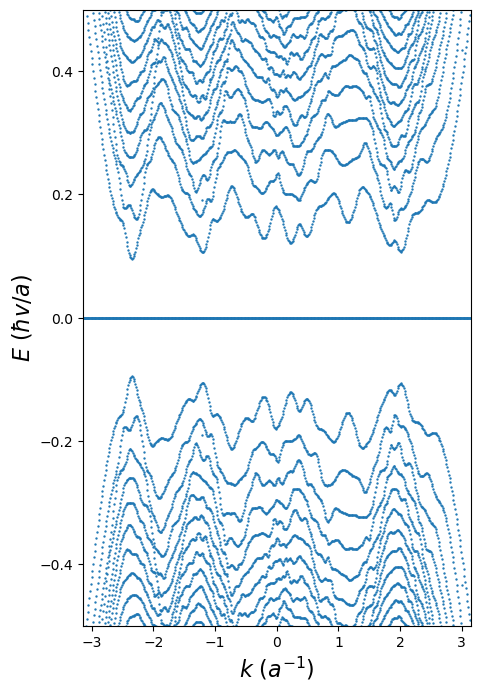

In [159]:
fig = plt.figure(figsize = (5,8))
axtan = fig.add_subplot(111)
for i in range(nbands):
    axtan.scatter(momenta, bands[:,i], c = 'C0', s = 0.5)
axtan.set_xlabel(r"$k$ $(a^{-1})$",fontsize = 16)
axtan.set_ylabel(r"$E$ $(\hbar v/a)$",fontsize = 16)

######These lines are useful to check units
# axtan.axhline(np.sqrt(2*mag_field), c = 'C1')########################################################  First Landau level
# axtan.axhline(-np.sqrt(2*mag_field), c = 'C1')########################################################
# axtan.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
# axtan.axline((0,0), slope=-1, color='C2', label='by slope')########################################
# axtan.axvline(Ly*mag_field/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
# axtan.axvline(-Ly*mag_field/2, c = 'C3')#######################
    
    
fig.show()
# axtan.axhline(np.sqrt(2*mag_field), c = 'C1')######################################################## These lines are useful to check units
# axtan.axline((0,0), slope=1, color='C2', label='by slope')########################################


axtan.set_ylim(-0.5,0.5)
axtan.set_xlim(kmin,kmax)

In [191]:
#zz is pi 0, 
magnetic_field = 0.013

parameters = dict(
    Lx = 1,
    Ly = 450,
    theta_top = pi,
    theta_bot = pi,
    mag_field = magnetic_field,
    mass = 0,
    noise = 0*magnetic_field,
    seed = 0
)


nbands = 50
momenta, bands = mb.make_bands_x(parameters,number_of_bands = nbands, number_of_points = int(500), kmin = -pi, kmax = pi)

Text(0.5, 0, '$k_x\\,(a^{-1})$')

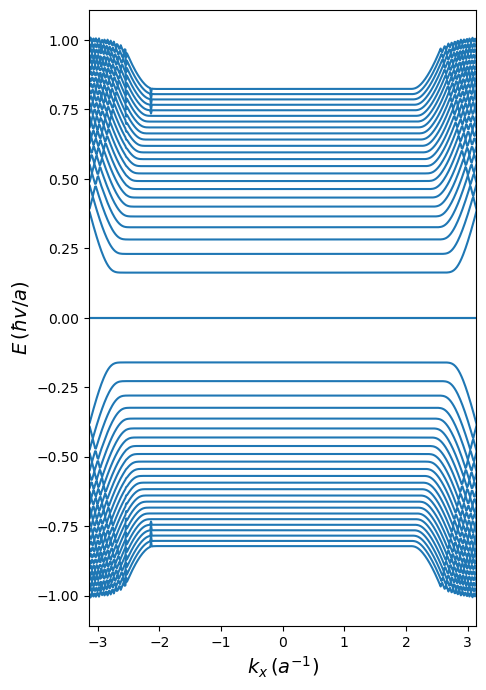

In [192]:
#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

#ax.set_ylim(-0.5,0.5)
ax.set_xlim(-pi,pi)
#ax.set_xlim(-0.5,0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1})$',fontsize = 14)


# ######These lines are useful to check units
# ax.axhline(np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################  First Landau level
# ax.axhline(-np.sqrt(2*parameters['mag_field']), c = 'C1')########################################################
# ax.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
# ax.axline((0,0), slope=-1, color='C2', label='by slope')########################################
# ax.axvline(parameters['Ly']*parameters['mag_field']/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
# ax.axvline(-parameters['Ly']*parameters['mag_field']/2, c = 'C3')#######################
    
    
# fig.show()

/tmp/ipykernel_109070/3840468072.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_109070/3840468072.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')


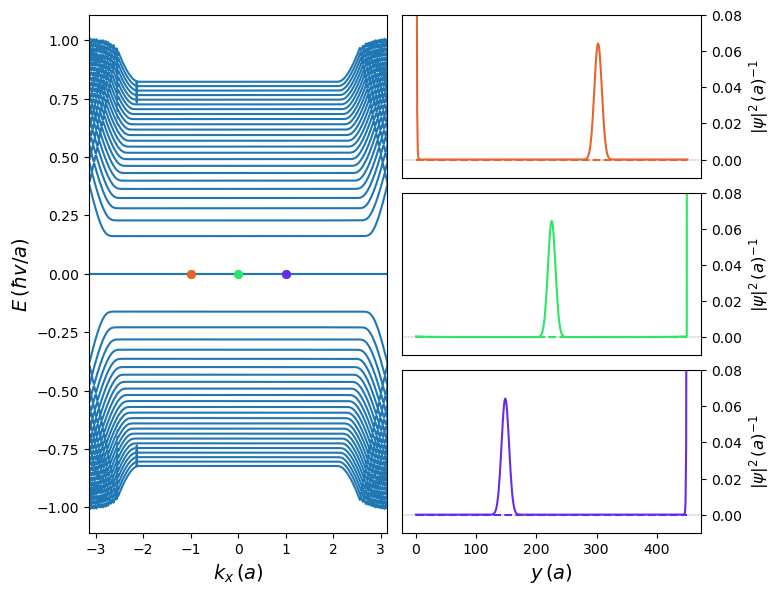

In [193]:
# Create figure
fig = plt.figure(figsize=(8, 6))  # Square figure

# Define grid layout: 2 columns, 3 rows
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

# Create subplots
ax = fig.add_subplot(gs[:, 0])
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

#ax.set_ylim(-0.25,0.25)
ax.set_xlim(-pi,pi)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a)$',fontsize = 14)

#Pinpoint states to plot
for i,shift in enumerate([-1,0,1]):

    #Calculate eignestates at kplot and plot.
    kplot = shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi, ind = mb.tangent_states(parameters, kplot,number_of_bands = int(6))

    ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[2]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[3]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

for i,shift in enumerate([-1,0,1]):
    #Plot state
    axstate = fig.add_subplot(gs[i, 1])  # Top-right
    space = np.linspace(0,parameters['Ly']+1,parameters['Ly']+1)
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2\,(a)^{-1}$',fontsize = 12)
    axstate.set_ylim(-0.01, 0.08)
    if i == nplots-1:
        axstate.set_xlabel(r'$y\,(a)$',fontsize = 14)
    else:
        axstate.xaxis.set_visible(False)

    axstate.yaxis.set_ticks_position("right")  # Move ticks to the right
    axstate.yaxis.set_label_position("right")  # Move labels to the right

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi, ind = mb.tangent_states(parameters, kplot,number_of_bands = int(6))

    # axstate.plot(space,np.abs(psi[1,0,:])**2 ,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[1,1,:])**2 ,c = rgb_colors[i]) ## sublattice b

    axstate.plot(space,np.abs(psi[0,0,:])**2 + np.abs(psi[1,0,:])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[0,1,:])**2 + np.abs(psi[1,1,:])**2,c = rgb_colors[i]) ## sublattice b
    
    # axstate.plot(space,np.abs(psi[0,0,:])**2 + np.abs(psi[1,0,:])**2 + np.abs(psi[2,0,:])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[0,1,:])**2 + np.abs(psi[1,1,:])**2 + np.abs(psi[2,1,:])**2,c = rgb_colors[i]) ## sublattice b
    
    # axstate.plot(space,np.abs(psi[0,0,:])**2 + np.abs(psi[1,0,:])**2 + np.abs(psi[2,0,:])**2 + np.abs(psi[3,0,:])**2,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[0,1,:])**2 + np.abs(psi[1,1,:])**2 + np.abs(psi[2,1,:])**2 + np.abs(psi[3,1,:])**2,c = rgb_colors[i]) ## sublattice b


# Show the figure
plt.tight_layout()
plt.show()

#fig.savefig("tangent_noise_zz.pdf", bbox_inches="tight")